In [2]:
import pandas as pd
import folium
import math
from folium.plugins import MarkerCluster, HeatMap
import plotly.graph_objects as go 
import plotly.express as px
import datetime
from plotly.subplots import make_subplots
import seaborn as sns 

In [21]:
df=pd.read_csv('https://raw.githubusercontent.com/VinitaSilaparasetty/coursera-spatial-data-analysis/master/boston-crime%202.csv')
df.head(3);

In [20]:
boston = (42.358443, -71.05977)
m=folium.Map(location=boston, tile='Stamen terrain', zoom_start=12)
m;

In [19]:
mc=MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'], row['Long']]))
m.add_child(mc);

In [6]:
crime=df.groupby(['DISTRICT', 'STREET', 'REPORTING_AREA', 'Lat', 'Long']).sum().reset_index()

In [7]:
crime.update(crime['DISTRICT'].map('District:{}'.format))
crime.update(crime['REPORTING_AREA'].map('Reports:{}'.format))

Boston Crime Dot Density Heat Map

In [8]:
m2=folium.Map(location=boston, tiles='stamentoner', zoom_start=12)
HeatMap(data=crime[['Lat', 'Long']], radius=15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location=[point.Lat, point.Long],
                        radius=5, 
                        weight=2,
                        popup=[point.DISTRICT, point.REPORTING_AREA],
                        fill_color='#000000').add_to(m2)
crime.apply(plotDot, axis=1)
m2.fit_bounds(m2.get_bounds())
m2


In [13]:
med=df.loc[df.OFFENSE_CODE_GROUP=='Medical Assistance'][['Lat','Long']]
med.Lat.fillna(0,inplace=True)
med.Long.fillna(0,inplace=True)
m6=folium.Map(location=boston, tiles='openstreetmap', zoon_start=11)
HeatMap(data=med, raidus=16).add_to(m6)
m6;

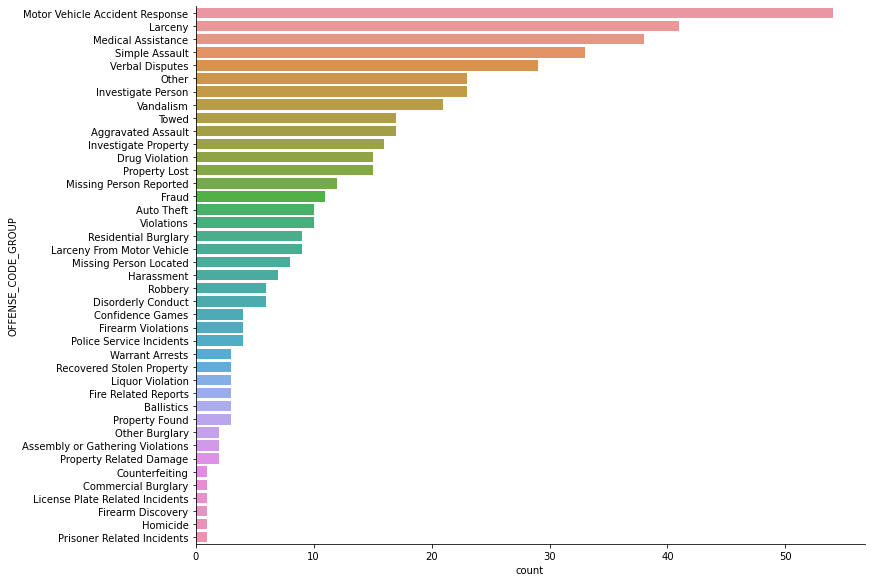

In [24]:
offense = sns.catplot(y='OFFENSE_CODE_GROUP',kind='count',height=8,aspect=1.5,order=df.OFFENSE_CODE_GROUP.value_counts().index,data=df);
offense;


Heat Map of Motor Vehicle Accident

In [11]:
mv=df.loc[df.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response'][['Lat', 'Long']]
mv.fillna(0,inplace=True)
mv.Lat.fillna(0,inplace=True)
mv.Long.fillna(0,inplace=True)
m4=folium.Map(location=boston, tiles='openstreetmap',zoom_start=11)
HeatMap(data=mv,radius=16).add_to(m4)
m4